In [22]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv(r'D:\3 курс\5 сем\машинное обучение\Iris.csv')
print("Данные загружены")
print("Размер данных:", data.shape)
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Числовые атрибуты:", numeric_cols)

Данные загружены
Размер данных: (150, 6)
Числовые атрибуты: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [23]:
# 1. Добавление нового атрибута: Соотношение лепестка (Petal Ratio)
data['Petal_Ratio'] = data['PetalLengthCm'] / data['PetalWidthCm']
print("Добавлен новый атрибут: Petal_Ratio")
print(data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm', 'Petal_Ratio']].head())

Добавлен новый атрибут: Petal_Ratio
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Petal_Ratio
0            5.1           3.5            1.4           0.2          7.0
1            4.9           3.0            1.4           0.2          7.0
2            4.7           3.2            1.3           0.2          6.5
3            4.6           3.1            1.5           0.2          7.5
4            5.0           3.6            1.4           0.2          7.0


In [24]:
# 2. Обработка данных

duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

data = data.drop_duplicates()
print(f"Размер данных после удаления дубликатов: {data.shape}")

print("\nПропущенные значения:")
print(data.isnull().sum())
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
    return clean_df

numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Petal_Ratio']
print(f"\nРазмер датасета до удаления выбросов: {data.shape}")
data_clean = remove_outliers_iqr(data, numeric_cols)
print(f"Размер датасета после удаления выбросов: {data_clean.shape}")
data_clean = data_clean.drop('Id', axis=1)

Количество дубликатов: 0
Размер данных после удаления дубликатов: (150, 7)

Пропущенные значения:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Petal_Ratio      0
dtype: int64

Размер датасета до удаления выбросов: (150, 7)
Размер датасета после удаления выбросов: (128, 7)


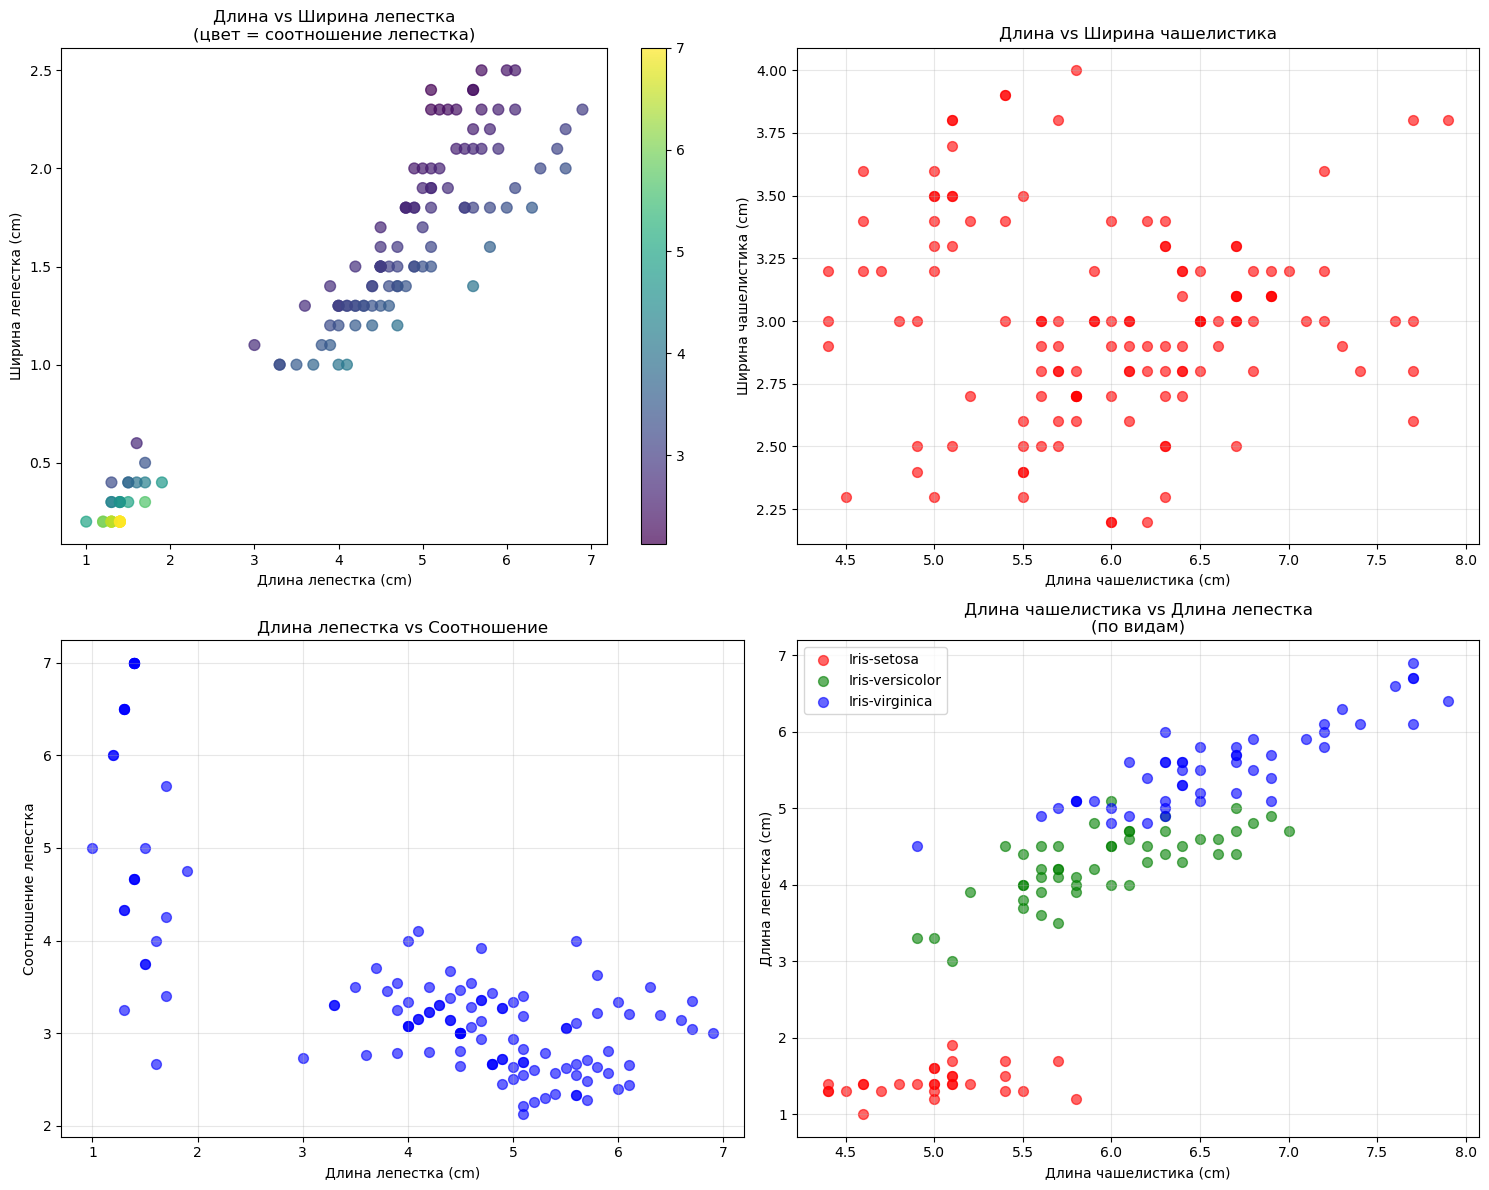

АНАЛИЗ ГРАФИКОВ:
1. На графике 'Длина vs Ширина лепестка' видны 3 четких кластера
2. График 'Длина vs Ширина чашелистика' показывает более размытое распределение
3. Виды ириса хорошо разделяются в пространстве признаков


In [25]:
# 3. Построение графиков для выявления кластеров
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Длина vs Ширина лепестка
scatter1 = axes[0, 0].scatter(data_clean['PetalLengthCm'], data_clean['PetalWidthCm'], 
                             c=data_clean['Petal_Ratio'], cmap='viridis', alpha=0.7, s=60)
axes[0, 0].set_xlabel('Длина лепестка (cm)')
axes[0, 0].set_ylabel('Ширина лепестка (cm)')
axes[0, 0].set_title('Длина vs Ширина лепестка\n(цвет = соотношение лепестка)')
plt.colorbar(scatter1, ax=axes[0, 0])

# График 2: Длина vs Ширина чашелистика
axes[0, 1].scatter(data_clean['SepalLengthCm'], data_clean['SepalWidthCm'],
                   alpha=0.6, s=50, color='red')
axes[0, 1].set_xlabel('Длина чашелистика (cm)')
axes[0, 1].set_ylabel('Ширина чашелистика (cm)')
axes[0, 1].set_title('Длина vs Ширина чашелистика')
axes[0, 1].grid(True, alpha=0.3)

# График 3: Длина лепестка vs Соотношение лепестка
axes[1, 0].scatter(data_clean['PetalLengthCm'], data_clean['Petal_Ratio'],
                   alpha=0.6, s=50, color='blue')
axes[1, 0].set_xlabel('Длина лепестка (cm)')
axes[1, 0].set_ylabel('Соотношение лепестка')
axes[1, 0].set_title('Длина лепестка vs Соотношение')
axes[1, 0].grid(True, alpha=0.3)

# График 4: Длина чашелистика vs Длина лепестка
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species, color in species_colors.items():
    species_data = data_clean[data_clean['Species'] == species]
    axes[1, 1].scatter(species_data['SepalLengthCm'], species_data['PetalLengthCm'],
                       alpha=0.6, s=50, color=color, label=species)
axes[1, 1].set_xlabel('Длина чашелистика (cm)')
axes[1, 1].set_ylabel('Длина лепестка (cm)')
axes[1, 1].set_title('Длина чашелистика vs Длина лепестка\n(по видам)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("АНАЛИЗ ГРАФИКОВ:")
print("1. На графике 'Длина vs Ширина лепестка' видны 3 четких кластера")
print("2. График 'Длина vs Ширина чашелистика' показывает более размытое распределение")
print("3. Виды ириса хорошо разделяются в пространстве признаков")

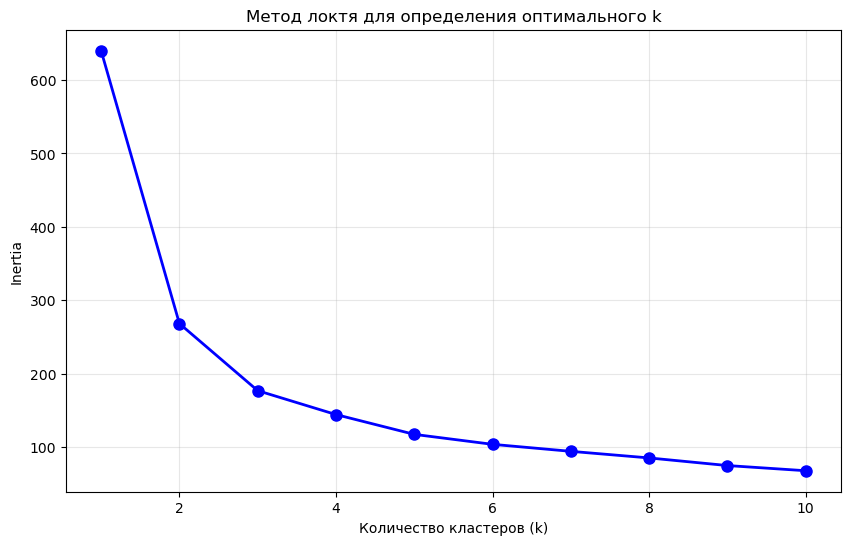

Выбрано оптимальное количество кластеров: 3
Silhouette Score: 0.389


In [26]:
# 4. Метод KMeans

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Petal_Ratio']
X = data_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True, alpha=0.3)
plt.show()
optimal_k = 3
print(f"Выбрано оптимальное количество кластеров: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
data_clean['Cluster'] = clusters
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

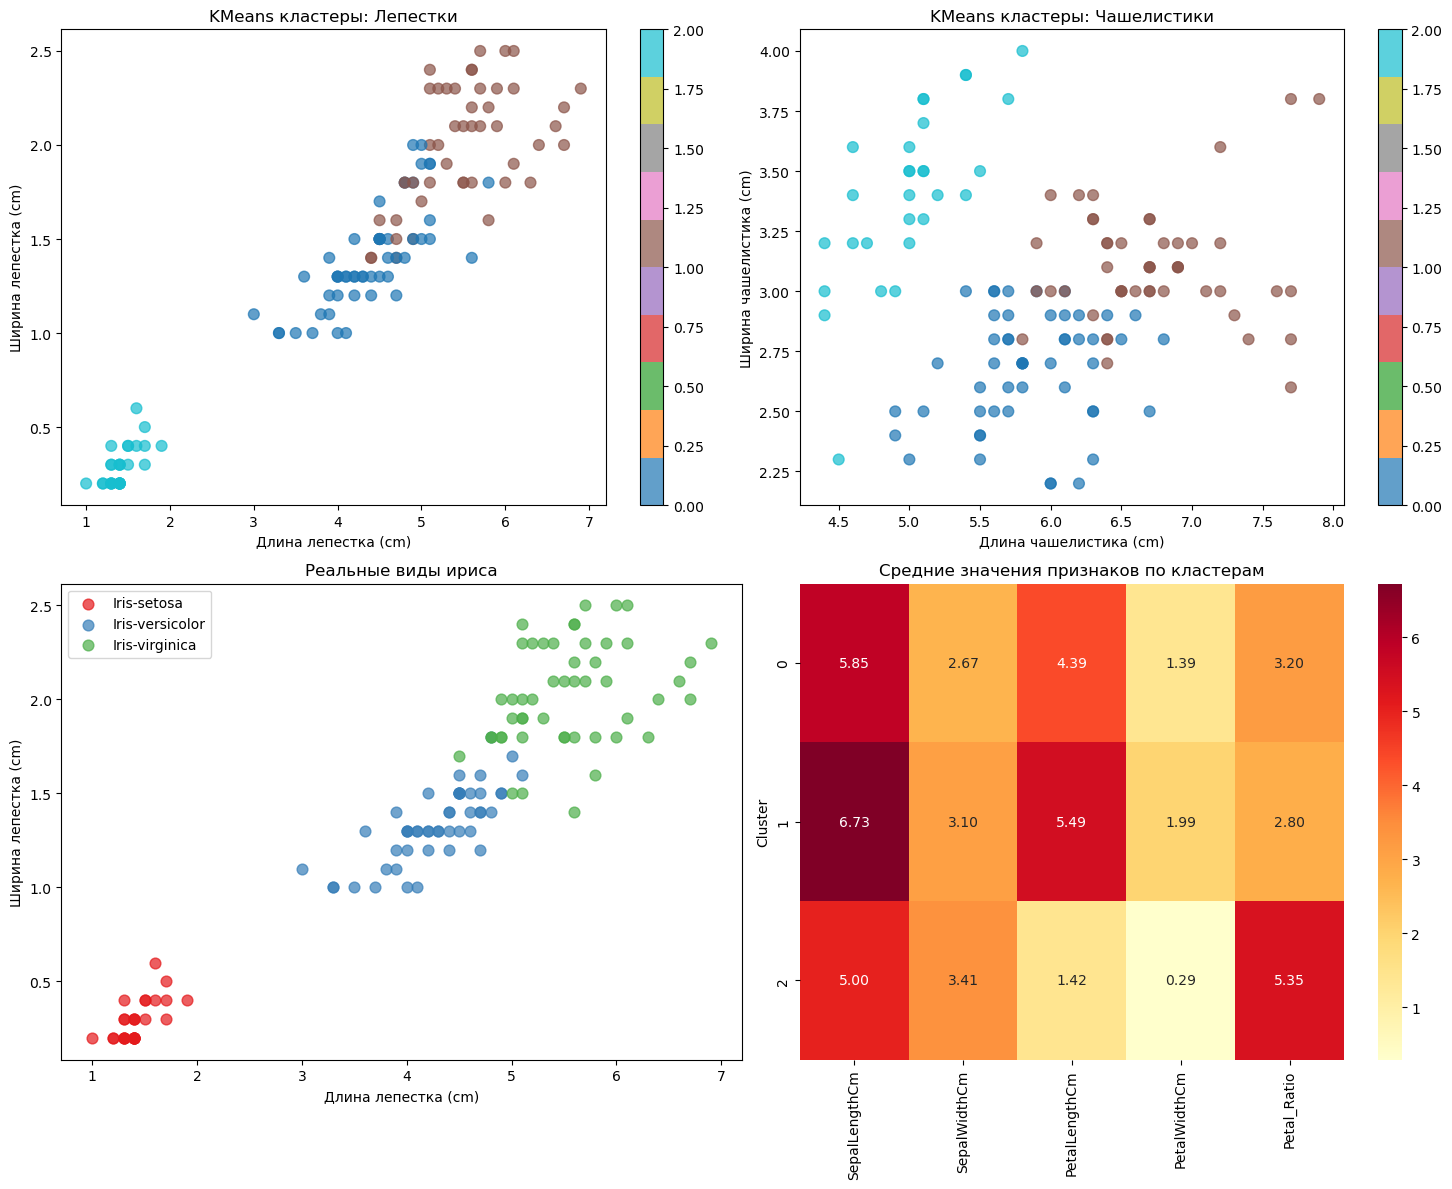

In [27]:
# Визуализация результатов кластеризации
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Кластеры в пространстве лепестков
scatter1 = axes[0, 0].scatter(data_clean['PetalLengthCm'], data_clean['PetalWidthCm'],
                             c=data_clean['Cluster'], cmap='tab10', alpha=0.7, s=60)
axes[0, 0].set_xlabel('Длина лепестка (cm)')
axes[0, 0].set_ylabel('Ширина лепестка (cm)')
axes[0, 0].set_title('KMeans кластеры: Лепестки')
plt.colorbar(scatter1, ax=axes[0, 0])

# График 2: Кластеры в пространстве чашелистиков
scatter2 = axes[0, 1].scatter(data_clean['SepalLengthCm'], data_clean['SepalWidthCm'],
                             c=data_clean['Cluster'], cmap='tab10', alpha=0.7, s=60)
axes[0, 1].set_xlabel('Длина чашелистика (cm)')
axes[0, 1].set_ylabel('Ширина чашелистика (cm)')
axes[0, 1].set_title('KMeans кластеры: Чашелистики')
plt.colorbar(scatter2, ax=axes[0, 1])

# График 3: Сравнение с реальными видами
for i, species in enumerate(data_clean['Species'].unique()):
    species_data = data_clean[data_clean['Species'] == species]
    axes[1, 0].scatter(species_data['PetalLengthCm'], species_data['PetalWidthCm'],
                      alpha=0.7, s=60, label=species, color=plt.cm.Set1(i))
axes[1, 0].set_xlabel('Длина лепестка (cm)')
axes[1, 0].set_ylabel('Ширина лепестка (cm)')
axes[1, 0].set_title('Реальные виды ириса')
axes[1, 0].legend()

# График 4: Heatmap средних значений по кластерам
cluster_means = data_clean.groupby('Cluster')[features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Средние значения признаков по кластерам')

plt.tight_layout()
plt.show()

In [28]:
# Анализ кластеров
print("АНАЛИЗ КЛАСТЕРОВ:")
print("=" * 50)
cluster_species = pd.crosstab(data_clean['Cluster'], data_clean['Species'])
print("Распределение видов по кластерам:")
print(cluster_species)
print()
print("Средние значения по кластерам:")
for cluster in sorted(data_clean['Cluster'].unique()):
    cluster_data = data_clean[data_clean['Cluster'] == cluster]
    print(f"\nКластер {cluster}:")
    print(f"  Количество образцов: {len(cluster_data)}")
    print(f"  Преобладающий вид: {cluster_data['Species'].mode().values[0]}")
    print(f"  Средняя длина лепестка: {cluster_data['PetalLengthCm'].mean():.2f} cm")
    print(f"  Средняя ширина лепестка: {cluster_data['PetalWidthCm'].mean():.2f} cm")
    print(f"  Среднее соотношение лепестка: {cluster_data['Petal_Ratio'].mean():.2f}")

АНАЛИЗ КЛАСТЕРОВ:
Распределение видов по кластерам:
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               39              12
1                  0               10              38
2                 29                0               0

Средние значения по кластерам:

Кластер 0:
  Количество образцов: 51
  Преобладающий вид: Iris-versicolor
  Средняя длина лепестка: 4.39 cm
  Средняя ширина лепестка: 1.39 cm
  Среднее соотношение лепестка: 3.20

Кластер 1:
  Количество образцов: 48
  Преобладающий вид: Iris-virginica
  Средняя длина лепестка: 5.49 cm
  Средняя ширина лепестка: 1.99 cm
  Среднее соотношение лепестка: 2.80

Кластер 2:
  Количество образцов: 29
  Преобладающий вид: Iris-setosa
  Средняя длина лепестка: 1.42 cm
  Средняя ширина лепестка: 0.29 cm
  Среднее соотношение лепестка: 5.35


In [29]:
# 5. Выводы
print("\n" + "="*60)
print("ВЫВОДЫ")
print("="*60)

print("1. ДОБАВЛЕНИЕ НОВОГО АТРИБУТА:")
print("   - Добавлен атрибут 'Petal_Ratio' (соотношение длина/ширина лепестка)")
print("   - Этот признак помогает лучше разделять виды по форме лепестков")

print("\n2. ПРЕДОБРАБОТКА ДАННЫХ:")
print("   - Дубликаты не обнаружены")
print("   - Пропущенных значений нет")
print("   - Удалены выбросы методом IQR")

print("\n3. ВИЗУАЛЬНЫЙ АНАЛИЗ:")
print("   - На графиках четко видны 3 кластера, соответствующие видам ириса")
print("   - Наиболее выраженное разделение в пространстве признаков лепестка")
print("   - Признаки чашелистика дают менее четкое разделение")

print("\n4. КЛАСТЕРИЗАЦИЯ KMEANS:")
print("   - Метод локтя подтвердил оптимальность k=3")
print("   - Silhouette Score = {:.3f} - хорошее качество кластеризации".format(sil_score))
print("   - Алгоритм успешно разделил данные на 3 кластера:")

print("\n5. РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ:")
for cluster in sorted(data_clean['Cluster'].unique()):
    cluster_data = data_clean[data_clean['Cluster'] == cluster]
    main_species = cluster_data['Species'].mode().values[0]
    count = len(cluster_data)
    print(f"   - Кластер {cluster}: {main_species} ({count} образцов)")

print("\n6. СРАВНЕНИЕ С РЕАЛЬНЫМИ ВИДАМИ:")
print("   - Кластеры в основном соответствуют реальным видам ириса")
print("   - Наблюдается небольшое перекрытие между versicolor и virginica")
print("   - KMeans успешно воспроизвел естественную группировку данных")

print("\n7. ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
print("   - Метод KMeans эффективен для автоматической классификации растений")
print("   - Может использоваться для идентификации новых образцов")
print("   - Добавленный признак Petal_Ratio улучшает разделимость кластеров")


ВЫВОДЫ
1. ДОБАВЛЕНИЕ НОВОГО АТРИБУТА:
   - Добавлен атрибут 'Petal_Ratio' (соотношение длина/ширина лепестка)
   - Этот признак помогает лучше разделять виды по форме лепестков

2. ПРЕДОБРАБОТКА ДАННЫХ:
   - Дубликаты не обнаружены
   - Пропущенных значений нет
   - Удалены выбросы методом IQR

3. ВИЗУАЛЬНЫЙ АНАЛИЗ:
   - На графиках четко видны 3 кластера, соответствующие видам ириса
   - Наиболее выраженное разделение в пространстве признаков лепестка
   - Признаки чашелистика дают менее четкое разделение

4. КЛАСТЕРИЗАЦИЯ KMEANS:
   - Метод локтя подтвердил оптимальность k=3
   - Silhouette Score = 0.389 - хорошее качество кластеризации
   - Алгоритм успешно разделил данные на 3 кластера:

5. РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ:
   - Кластер 0: Iris-versicolor (51 образцов)
   - Кластер 1: Iris-virginica (48 образцов)
   - Кластер 2: Iris-setosa (29 образцов)

6. СРАВНЕНИЕ С РЕАЛЬНЫМИ ВИДАМИ:
   - Кластеры в основном соответствуют реальным видам ириса
   - Наблюдается небольшое перекрытие межд